# Exploring Cordle

4/13/22

David Tersegno

Cordle is a card game. A deck building game. The cards are made of the game board shared from a Wordle game. These are made of a grid of width 5 and heights 1 through 6. Each square in the grid can be either gray, yellow, or green. Any of height 5 or shorter has a full green bottom row.

Cards are drawn and placed over each other. The values add from gray, yellow, green, 0, 1, 2.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


plt.style.use('dark_background')

Using [the NumPy docs on np.random](https://numpy.org/doc/stable/reference/random/index.html?highlight=random#module-numpy.random) to figure out the best practice, as opposed to `np.random.seed()`.

In [44]:
from numpy.random import default_rng
rng = default_rng()
vals = rng.standard_normal(10)
more_vals = rng.standard_normal(10)

In [59]:
np.random.choice([1,2,3,4], size = 10, p = np.array([1,2,3,4])/10)

array([4, 4, 3, 4, 3, 4, 4, 2, 1, 3])

In [135]:
#returns a wordle-like color grid. 
# 0 - gray
# 1 - yellow
# 2 - green

#create the default squares. entry:proportion
default_entries = {
    0:3,
    1:2,
    2:1
}

def make_random_wordle(height:int = 6, entries = default_entries) -> list:
    this_game = [
        [
            np.random.choice([*entries.keys()],  p = np.array([*entries.values()])/sum([*entries.values()]))
            for col in range(5) # every row is always width 5
        ]
        for row in range(height)
    ]
    #print(np.array([*entries.values()])/sum([*entries.values()]))
    return this_game

In [136]:
sum([*default_entries.values()])

6

In [137]:
np.array(make_random_wordle())

array([[1, 1, 0, 2, 0],
       [0, 2, 0, 2, 0],
       [0, 0, 2, 0, 2],
       [0, 1, 0, 1, 1],
       [1, 1, 0, 1, 0],
       [1, 2, 0, 0, 0]])

In [138]:
empty_game = [list(np.full(5,0))]*6
empty_game

[[0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0]]

In [139]:
game = empty_game.copy()

game[0] = [ 0 ,1 , 0 , 0 ,0 ]
game[1] = [2, 0, 2, 0, 0 ]
game[2] = [2, 0, 2, 0, 0 ]
game[3] = [2, 1 , 2, 0, 0 ]
game[4] = [2, 2, 2, 2, 2]
game = np.array(game)
game

array([[0, 1, 0, 0, 0],
       [2, 0, 2, 0, 0],
       [2, 0, 2, 0, 0],
       [2, 1, 2, 0, 0],
       [2, 2, 2, 2, 2],
       [0, 0, 0, 0, 0]])

In [140]:
game.tolist()

[[0, 1, 0, 0, 0],
 [2, 0, 2, 0, 0],
 [2, 0, 2, 0, 0],
 [2, 1, 2, 0, 0],
 [2, 2, 2, 2, 2],
 [0, 0, 0, 0, 0]]

In [141]:
color_dict = {
        0:[0.5,0.5,0.5], #gray
        1:[.8, .8, .4], # yellow
        2:[.4, .9, .4] #green
    }

In [142]:
game_color = np.array([
    [
        color_dict[square]
        for square in row
    ]
    for row in game
])

empty_game_color = np.array([
    [
        color_dict[square]
        for square in row
    ]
    for row in empty_game
])

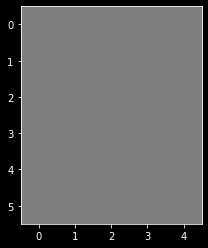

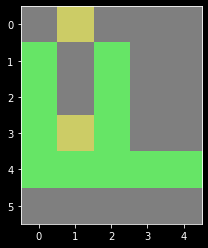

In [143]:
plt.xticks(None)

plt.imshow(empty_game_color, cmap = 'gray')
plt.show()
plt.imshow(game_color.tolist());

In [144]:
def color_card(card:list):
    color_dict = {
        0:[0.5,0.5,0.5], #gray
        1:[.8, .8, .4], # yellow
        2:[.4, .9, .4] #green
    }
    this_card = np.array([
        [
            color_dict[square]
            for square in row
        ]
        for row in card
    ])
    return this_card

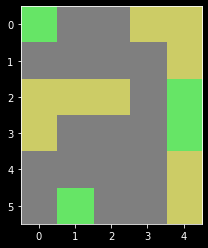

In [158]:
plt.imshow(color_card(make_random_wordle()))

In [ ]:
#takes in a wordle game, places it on the board, and applies rules to modify squares.
#normal rules 
def place_card_on_board(card:list, game:list, level:int, rule = 'normal'):
    